# INFO 7390 Advanced Data Science
## -- Assignment 1 
### Hao Wu 001443861

#### Import packages and modules

In [226]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

import random

#### Import data

In [208]:
data = pd.read_csv('https://raw.githubusercontent.com/22557i/INFO7390AdvancedDataScience/master/Assignment1/googleplaystore.csv',encoding='ISO-8859-1')
reviews = pd.read_csv('https://raw.githubusercontent.com/22557i/INFO7390AdvancedDataScience/master/Assignment1/googleplaystore_user_reviews.csv',encoding='ISO-8859-1')

In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [210]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


## Data Visualization

In [223]:
d1=data[data['Type']=='Free']
d2=data[data['Type']=='Paid']

In [228]:
col='Content Rating'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.astype(str).sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name="Free", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="Paid", marker=dict(color="#6ad49b"))
y = [trace1, trace2]
layout={'title':"Ratings of the free vs paid app",'xaxis':{'title':"Ratings"}}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

In [229]:

v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Bar(x=v2[col], y=v2["count"], name="aid",  marker=dict(color="#6ad49b"))
layout={'title':"Paid App Content Rating",'xaxis':{'title':"contents"}}
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

In [230]:
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Bar(x=v2[col], y=v2["count"], name="aid",  marker=dict(color="#6ad49b"))
layout={'title':"Paid App Content Rating",'xaxis':{'title':"contents"}}
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

In [231]:
col='Rating'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.astype(str).sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name="Free", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="Paid", marker=dict(color="#6ad49b"))
y = [trace1, trace2]
layout={'title':"Ratings of the free vs paid app",'xaxis':{'title':"Ratings"}}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

In [235]:
col='Rating'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
trace1 = go.Bar(x=v1[col], y=v1["count"], name="Free", marker=dict(color = 'yellowgreen'))
layout={'title':"Free App Rating",'xaxis':{'title':"Ratings"}}
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

In [233]:
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Bar(x=v2[col], y=v2["count"], name="Paid",  marker=dict(color="b"))
layout={'title':"Paid App Rating",'xaxis':{'title':"Ratingss"}}
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

## Models

### Linear regression

In [211]:
from sklearn.linear_model import LinearRegression
df =  pd.read_csv('https://raw.githubusercontent.com/22557i/INFO7390AdvancedDataScience/master/Assignment1/googleplaystore.csv',encoding='ISO-8859-1')
df.dropna(inplace = True)
CategoryString = df["Category"]
categoryVal = df["Category"].unique()
categoryValCount = len(categoryVal)
category_dict = {}
for i in range(0,categoryValCount):
    category_dict[categoryVal[i]] = i
df["Category_c"] = df["Category"].map(category_dict).astype(int)

def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    else:
        return None

df["Size"] = df["Size"].map(change_size)

df.Size.fillna(method = 'ffill', inplace = True)
df['Installs'] = [int(i[:-1].replace(',','')) for i in df['Installs']]
def type_cat(types):
    if types == 'Free':
        return 0
    else:
        return 1

df['Type'] = df['Type'].map(type_cat)
RatingL = df['Content Rating'].unique()
RatingDict = {}
for i in range(len(RatingL)):
    RatingDict[RatingL[i]] = i
df['Content Rating'] = df['Content Rating'].map(RatingDict).astype(int)
df.drop(labels = ['Last Updated','Current Ver','Android Ver','App'], axis = 1, inplace = True)
GenresL = df.Genres.unique()
GenresDict = {}
for i in range(len(GenresL)):
    GenresDict[GenresL[i]] = i
df['Genres_c'] = df['Genres'].map(GenresDict).astype(int)

def price_clean(price):
    if price == '0':
        return 0
    else:
        price = price[1:]
        price = float(price)
        return price

df['Price'] = df['Price'].map(price_clean).astype(float)
df['Reviews'] = df['Reviews'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 11 columns):
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null int64
Size              9360 non-null float64
Installs          9360 non-null int64
Type              9360 non-null int64
Price             9360 non-null float64
Content Rating    9360 non-null int64
Genres            9360 non-null object
Category_c        9360 non-null int64
Genres_c          9360 non-null int64
dtypes: float64(3), int64(6), object(2)
memory usage: 877.5+ KB


In [212]:
df2 = pd.get_dummies(df, columns=['Category'])

df2.head()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_c,Genres_c,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,4.1,159,19000000.0,10000,0,0.0,0,Art & Design,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967,14000000.0,500000,0,0.0,0,Art & Design;Pretend Play,0,1,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,8700000.0,5000000,0,0.0,0,Art & Design,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,25000000.0,50000000,0,0.0,1,Art & Design,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967,2800000.0,100000,0,0.0,0,Art & Design;Creativity,0,2,...,0,0,0,0,0,0,0,0,0,0


No handles with labels found to put in legend.


<Figure size 864x504 with 0 Axes>

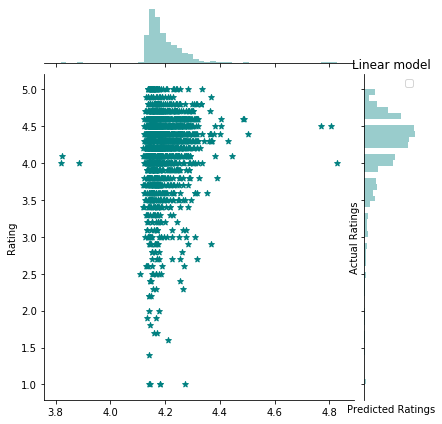

The mean error of Linear regression model:


0.2695046691306782

In [219]:
X = df.drop(labels = ['Category','Rating','Genres','Genres_c'],axis = 1)
y = df.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
model = LinearRegression()
model.fit(X_train,y_train)
Results = model.predict(X_test)
plt.figure(figsize=(12,7))
sns.jointplot(Results,y_test,color='teal', label = 'Integer', marker = '*')

plt.legend()
plt.title('Linear model')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()
print("The mean error of Linear regression model:")
metrics.mean_squared_error(Results,y_test)

### Support Vector Machine Model

/Users/harold/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
No handles with labels found to put in legend.


<Figure size 864x504 with 0 Axes>

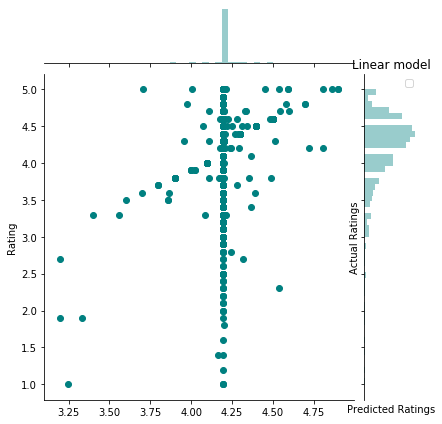

The mean error of Support Vector Machine model:


0.2634063813082126

In [220]:
from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state = 666)
model2 = svm.SVR()
model2.fit(X_train,y_train)

Results2 = model2.predict(X_test)
plt.figure(figsize=(12,7))
sns.jointplot(Results2,y_test,color='teal', label = 'Integer')

plt.legend()
plt.title('Linear model')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()
print("The mean error of Support Vector Machine model:")
metrics.mean_squared_error(Results2,y_test)

### Random Forest Regression Model

In [221]:
from sklearn.ensemble import RandomForestRegressor
category_list = data['Category'].unique().tolist() 
category_list = ['Category_' + word for word in category_list]
features = [ 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating']
features.extend(category_list)
features.remove('Category_1.9')
X = df2[features]
y = df2['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 666)

model = RandomForestRegressor(n_estimators=20, 
                               bootstrap = True)
# Fit on training data
model.fit(X_train, y_train)

# Actual class predictions
rf_predictions = model.predict(X_test)

submission_data= y_test.to_frame()
submission_data.columns = ['Actual_Rating']
submission_data['Predicted_Rating'] = rf_predictions

The mean error of Linear regression model:


0.23165626759481842

No handles with labels found to put in legend.


<Figure size 1080x1080 with 0 Axes>

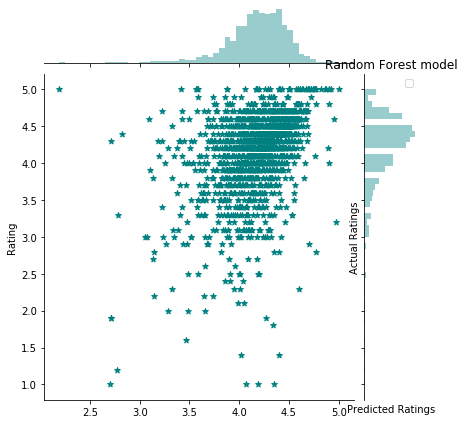

The mean error of Linear regression model:


0.23165626759481842

In [222]:
plt.figure(figsize=(15,15))
sns.jointplot(rf_predictions,y_test,color='teal', marker = '*')
plt.legend()
plt.title('Random Forest model')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()
print("The mean error of Linear regression model:")
metrics.mean_squared_error(rf_predictions,y_test)